In [167]:
import pandas as pd
import numpy as np


In [168]:
df = pd.read_csv("build/default.csv")
time_arr = np.array(df["time[s]"]).transpose()
np_arr = np.array(df[["LF_EXT-LF_FLX", 
                    "LH_EXT-LH_FLX", 
                    "RF_EXT-RF_FLX", 
                    "RH_EXT-RH_FLX"]])
np_arr_raw = np_arr.transpose()
np_arr = (np_arr > 0.0).transpose()

In [169]:
np_arr_bar = [[0], [0], [0], [0]]
pull = [True, True, True, True]
for i in range(len(np_arr[0])):
    for j in range(4):
        if np_arr[j][i] == pull[j]:
            np_arr_bar[j].append(i)
            pull[j] = not pull[j]


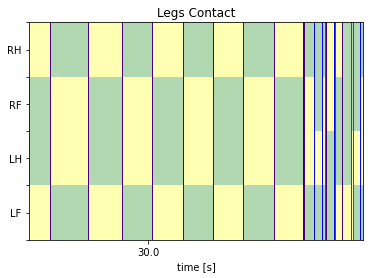

In [176]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
fill = [True, True, True, True]
start = 25
end = 39

overlap = []

plt.title("Legs Contact")
color_lines = ['r', 'g', 'b', 'indigo']
for j in range(4):
    for i in range(1, len(np_arr_bar[j])):
        if (fill[j]):
            fc = "green"
        else:
            fc = "yellow"
        plt.fill_betweenx(np.array([j - 0.5, j + 0.5]), np_arr_bar[j][i - 1], np_arr_bar[j][i], facecolor=fc, alpha=0.3)
        plt.axvline(x = np_arr_bar[j][i], color = color_lines[j], linestyle = '-', linewidth=1)
        fill[j] = not fill[j]

plt.xticks(plt.xticks()[0], plt.xticks()[0] * 0.001)
plt.yticks(plt.yticks()[0], ["", "", "LF", "", "LH", "", "RF", "", "RH", "", ""])
plt.xlim(1000 * start, 1000 * end)
plt.ylim(-0.5, 3.5)
plt.xlabel("time [s]") 
plt.savefig("fig.svg")
plt.show()

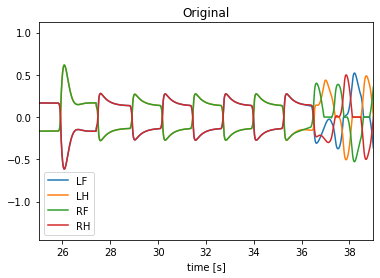

In [177]:
plt.title("Original")
plt.plot(time_arr, np_arr_raw[0], label="LF")
plt.plot(time_arr, np_arr_raw[1], label="LH")
plt.plot(time_arr, np_arr_raw[2], label="RF")
plt.plot(time_arr, np_arr_raw[3], label="RH")
plt.xlabel("time [s]") 
plt.xlim(start, end)
plt.legend()
plt.show()
